# Experiment Analysis: Censoring Proportion w.r.t. Failure Volume

**Purpose**:
As suggested by the title, analyze the outputs of the experiment on the impact of censoring on model training and model performance

**Raytheon Technologies proprietary**

Export controlled - see license file

In [8]:
from json import loads as read_json_string
from pathlib import Path

from pandas import read_csv, DataFrame, MultiIndex

In [2]:
experiment_root = Path('outputs-2022-02-03-1455/')
list(experiment_root.iterdir())

[PosixPath('outputs-2022-02-03-1455/log.log'),
 PosixPath('outputs-2022-02-03-1455/censoring_experiment-2022-02-03T19:18:40.csv')]

In [4]:
experiment_outputs = read_csv('outputs-2022-02-03-1455/censoring_experiment-2022-02-03T19:18:40.csv')

In [5]:
experiment_outputs

,RMSE,MSE,MFE,SMAPE,SMPE,Prediction_count,Real_count,NaN_count,loss_train_total,loss_train_max,loss_train_min,loss_val_total,loss_val_max,loss_val_min,training_seconds,censoring_proportion,losses_json
0,32.163939,1034.518972,25.119330,0.732401,-0.689523,3984,3258,726,2446.425927,20.166746,3.994117,919.767119,3.816248,1.648060,341.917357,0.0,"{""training_losses"": [20.166745920250932, 10.33..."
1,28.595613,817.709079,20.427649,0.528787,-0.409354,3984,3984,0,2538.790364,10.370021,4.277472,996.790327,2.867329,1.816209,336.887542,0.0,"{""training_losses"": [10.370021021319804, 8.310..."
2,24.372177,594.002997,14.807623,0.406164,-0.206525,3984,3984,0,2481.545567,9.125534,4.123378,973.356948,2.957743,1.735286,335.888940,0.0,"{""training_losses"": [9.125533978126363, 7.8751..."
3,32.477578,1054.793044,19.954198,0.419990,-0.216353,8280,8280,0,3208.662737,82.848475,4.749005,1994.045086,24.665804,3.428166,510.756807,0.5,"{""training_losses"": [82.8484748384916, 33.6544..."
4,40.898307,1672.671553,31.826954,0.650043,-0.586335,8280,8249,31,3160.948545,74.020543,4.916848,3537.690974,17.269760,3.687462,511.275262,0.5,"{""training_losses"": [74.02054274140502, 25.058..."
5,27.943468,780.837412,-10.831738,0.325723,0.221652,8280,8280,0,3127.408874,137.797119,4.361432,1655.994862,35.513759,2.482267,513.016982,0.5,"{""training_losses"": [137.79711856858384, 43.98..."
6,43.453414,1888.199227,35.165583,0.706515,-0.662731,12489,12355,134,2747.261985,33.302433,4.320656,1495.953493,7.338298,2.305004,683.013617,1.0,"{""training_losses"": [33.302432672266285, 17.30..."
7,45.096514,2033.695555,36.980487,0.765785,-0.740477,12489,12463,26,3048.112702,93.875809,4.429776,1866.588025,31.298205,2.439093,683.582505,1.0,"{""training_losses"": [93.87580914124041, 31.163..."
8,38.596799,1489.712876,25.525182,0.495406,-0.303806,12489,12484,5,2847.506058,59.360470,4.451414,1297.738102,10.271272,2.348537,683.683570,1.0,"{""training_losses"": [59.36047021993591, 25.382..."
9,46.483845,2160.747854,38.405123,0.778037,-0.756894,20812,20366,446,2934.066945,54.427310,4.244674,28242.543892,149.511953,9.429673,1024.633495,2.0,"{""training_losses"": [54.4273096417142, 21.1906..."


In [46]:
feature_sets = {
    "loss_aggregates": [n for n in experiment_outputs.columns if n.startswith('loss_')]
}

experiment_loss_aggregates = experiment_outputs[feature_sets['loss_aggregates'] + ['censoring_proportion']]

### Loss Trends

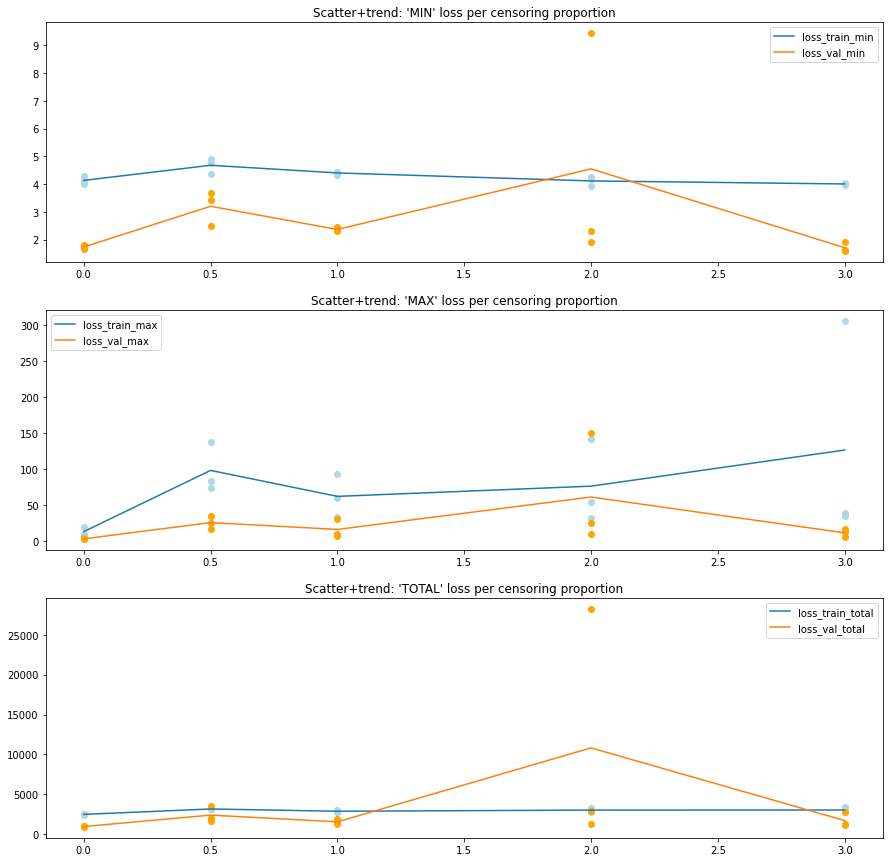

In [47]:
def plot_scatter_losses():
    agged = (experiment_loss_aggregates.groupby('censoring_proportion'))
    
    fig, ax = plt.subplots(nrows=3,figsize=(15, 15))
    
    for failure_proportion, losses in agged:
        failure_axis = [failure_proportion] * len(losses) # gotta be the same x-value len(losses) times over, because matplotlib doesn't broadcast
        ax[0].scatter(failure_axis, losses['loss_train_min'], color='lightblue')
        ax[0].scatter(failure_axis, losses['loss_val_min'], color='orange')

        ax[1].scatter(failure_axis, losses['loss_train_max'], color='lightblue')
        ax[1].scatter(failure_axis, losses['loss_val_max'], color='orange')

        ax[2].scatter(failure_axis, losses['loss_train_total'], color='lightblue')
        ax[2].scatter(failure_axis, losses['loss_val_total'], color='orange')


    xs_ = [failure_prop for failure_prop, _ in agged]
    
    for summ_stat, ax in zip('min max total'.split(), ax):
        ys_train = [losses[f'loss_train_{summ_stat}'].mean() for failure_proportion, losses in agged]
        ys_val = [losses[f'loss_val_{summ_stat}'].mean() for failure_proportion, losses in agged]
        ax.plot(xs_, ys_train, label=f'loss_train_{summ_stat}')
        ax.plot(xs_, ys_val, label=f'loss_val_{summ_stat}')
        ax.set_title(f"Scatter+trend: '{summ_stat.upper()}' loss per censoring proportion")
        ax.legend()
    
    plt.show()
plot_scatter_losses()

### Error Trends

In [48]:
experiment_outputs["MFE"].where(experiment_outputs["MFE"] > 0, -experiment_outputs["MFE"])

0     25.119330
1     20.427649
2     14.807623
3     19.954198
4     31.826954
5     10.831738
6     35.165583
7     36.980487
8     25.525182
9     38.405123
10     7.692025
11    92.805312
12     0.762628
13    29.626165
14    21.415903
Name: MFE, dtype: float64

In [54]:
from numpy import sign

In [69]:
def abs_min(x): return x.abs().min()

In [70]:
experiment_outputs.groupby('censoring_proportion')['MSE RMSE MFE SMAPE SMPE'.split()].agg([abs_min])

,MSE,RMSE,MFE,SMAPE,SMPE
,abs_min,abs_min,abs_min,abs_min,abs_min
censoring_proportion,,,,,
0.0,594.002997,24.372177,14.807623,0.406164,0.206525
0.5,780.837412,27.943468,10.831738,0.325723,0.216353
1.0,1489.712876,38.596799,25.525182,0.495406,0.303806
2.0,891.792595,29.862897,7.692025,0.323924,0.171813
3.0,629.175326,25.083368,0.762628,0.267973,0.085548


In [73]:
import numpy as np

In [74]:
def find_best_performing_error_metrics(
    df: DataFrame,
    selected_columns = 'MSE RMSE MFE SMAPE SMPE'.split()
) -> DataFrame:

    grouped = list(df.groupby('censoring_proportion')[selected_columns])

    out = dict()
    for group, sub_df in grouped:
        sub_df = sub_df[selected_columns]
        abs_min_df = sub_df.abs().min(axis=0)
        index_df = (abs_min_df == sub_df.abs())
        # display(index_df)
        selected = sub_df.where(index_df, 50)
        # display(selected)
        selection = np.nansum(selected[selected != 50], axis=0)
        out[group] = selection

    return (
        DataFrame(out).T
        .rename(columns=lambda i: selected_columns[i])
        .rename_axis('censoring_proportion')
    )

find_best_performing_error_metrics(experiment_outputs)

,MSE,RMSE,MFE,SMAPE,SMPE
censoring_proportion,,,,,
0.0,594.002997,24.372177,14.807623,0.406164,-0.206525
0.5,780.837412,27.943468,-10.831738,0.325723,-0.216353
1.0,1489.712876,38.596799,25.525182,0.495406,-0.303806
2.0,891.792595,29.862897,-7.692025,0.323924,0.171813
3.0,629.175326,25.083368,-0.762628,0.267973,0.085548


## Surface-level findings

From this table, several things are already highly evident:
- Training time scales linearly with the *expected* data volume multiplied of the censoring proportion
  - e.g. 0.0 -> 0.5 should seen a 50% increase in training and test set sizes. Correspondingly, training time only increases by ~50%
- However, we see the actual number of inferences isn't obviously linear.
  - It's roughly $O(2(N+1))$, which is still linear, but not the $O(n)$ we see in training time.
  - Hence, we can infer two things
     1. The censored portion of the devices tend to be longer in this data set. (This makes sense, as they are definitely not cut short)
     2. The GPU may currently be under-utilized.
- Regression errors don't differ wildly as the censoring presence / data volume increases. This is encouraging of the paper model's capacity for this solving this problem.

## Cohort analysis

Let's take a closer look at each of these groups

In [6]:
grouped = experiment_outputs.groupby('censoring_proportion')

In [7]:
grouped.indices

{0.0: array([0, 1, 2]),
 0.5: array([3, 4, 5]),
 1.0: array([6, 7, 8]),
 2.0: array([ 9, 10, 11]),
 3.0: array([12, 13, 14])}

### Learning Curves

len(cohort_loss_curves) = 3
len(cohort_loss_curves) = 3
len(cohort_loss_curves) = 3
len(cohort_loss_curves) = 3
len(cohort_loss_curves) = 3


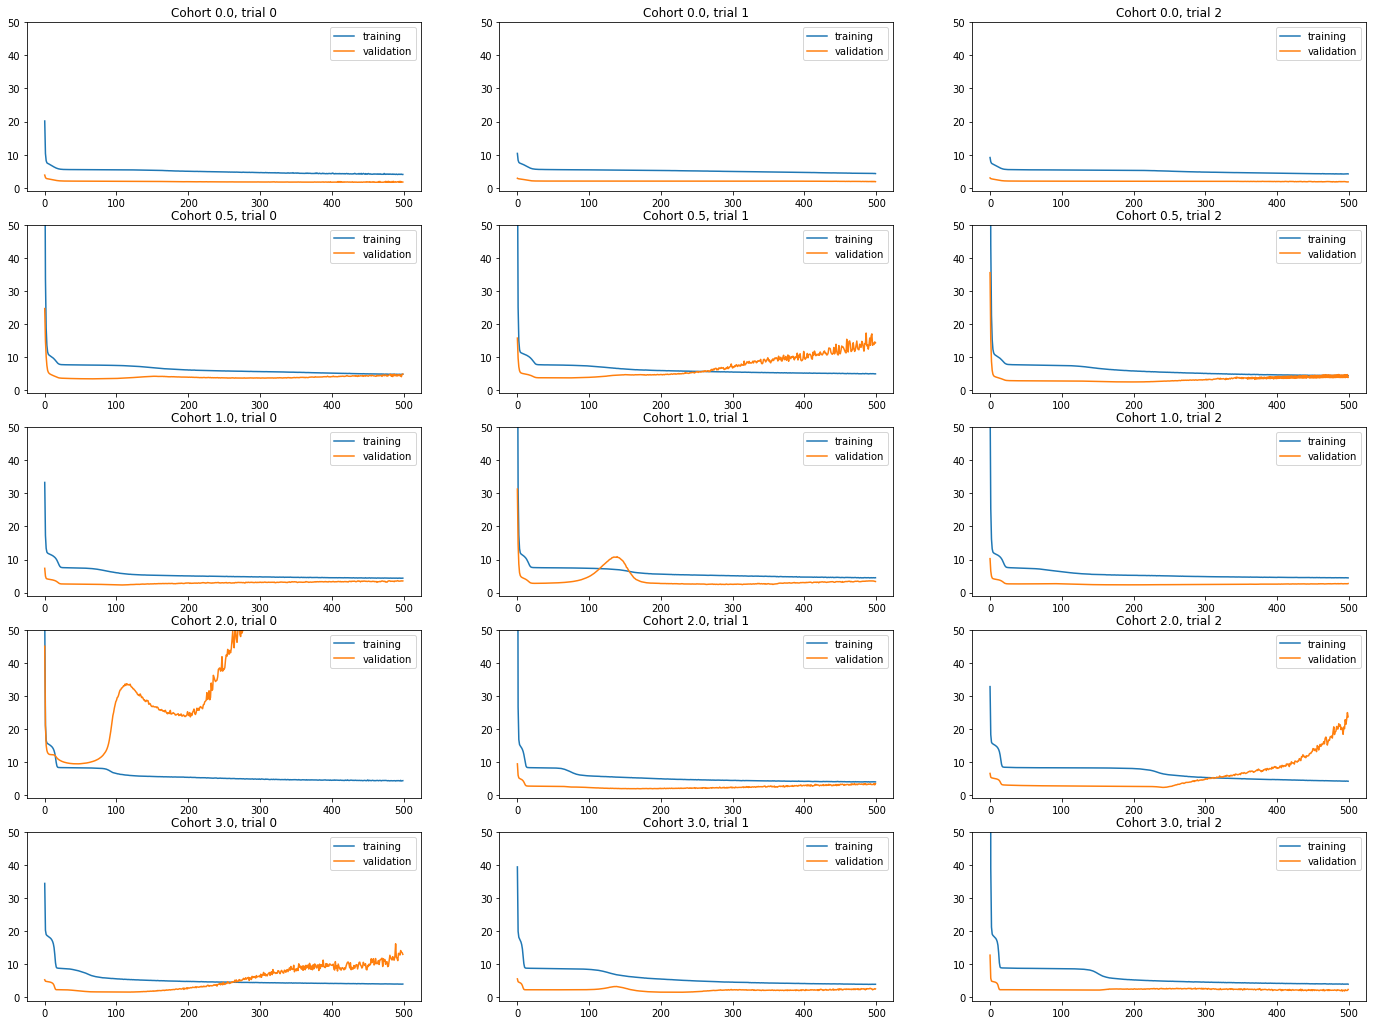

In [23]:
from matplotlib import pyplot as plt

def visualize_losses():
    cohorts = list(grouped)
    
    fig, axes = plt.subplots(len(cohorts), 3, figsize=(24, 18))
    
    for i_cohort, (cohort_id, cohort_df) in enumerate(cohorts):
        cohort_loss_curves = cohort_df['losses_json'].map(read_json_string)
        print(f"{len(cohort_loss_curves) = }")
        
        for i_curve, curve_pair in enumerate(cohort_loss_curves):

            ax = axes[i_cohort, i_curve]
            ax.plot(curve_pair['training_losses'], label='training')
            ax.plot(curve_pair['validation_losses'], label='validation')
            ax.set_title(f"Cohort {cohort_id}, trial {i_curve}")
            
            ax.set_ylim(-1, 50)
            ax.legend()
        
visualize_losses()

censoring_proportion
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
0.5    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

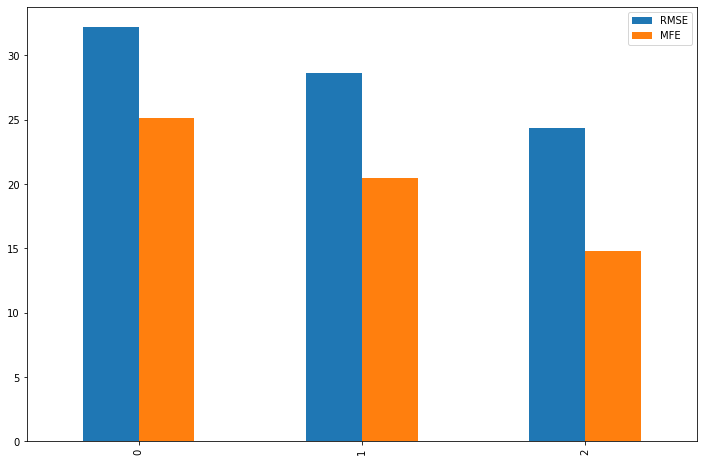

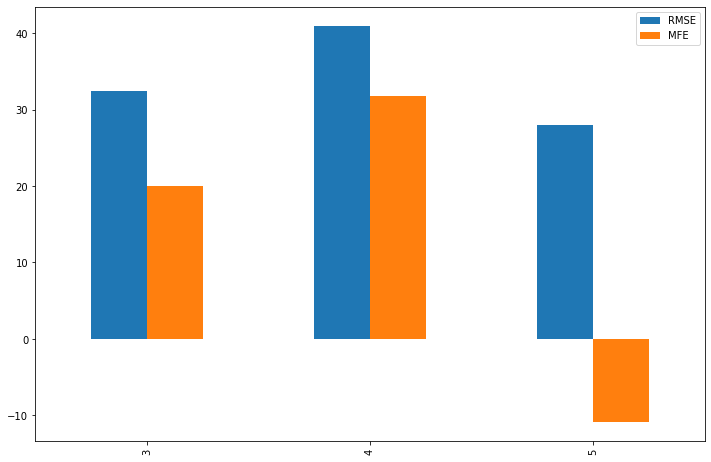

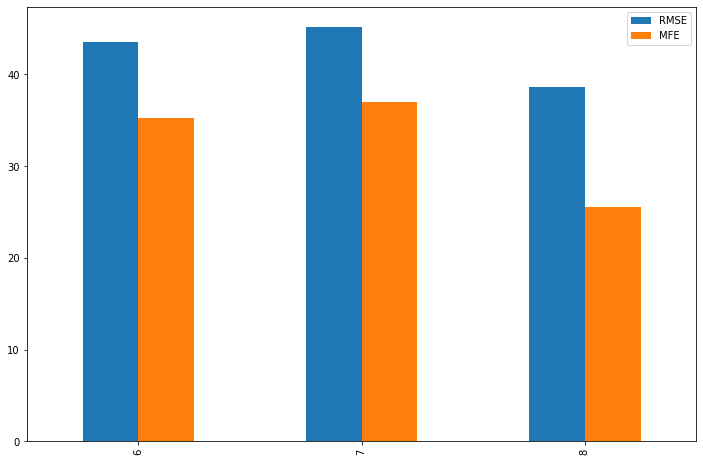

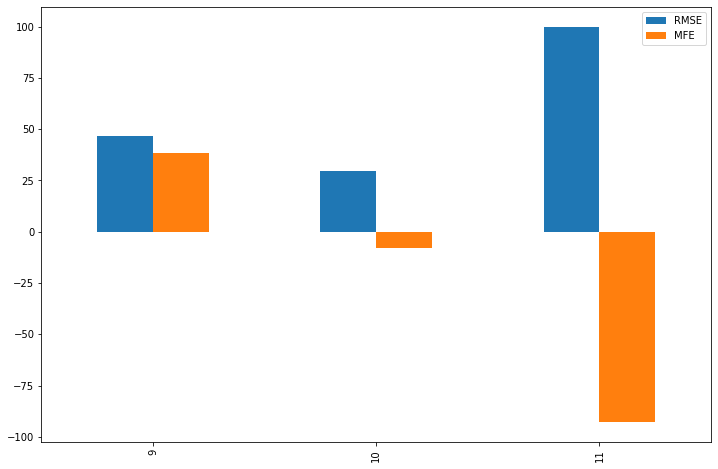

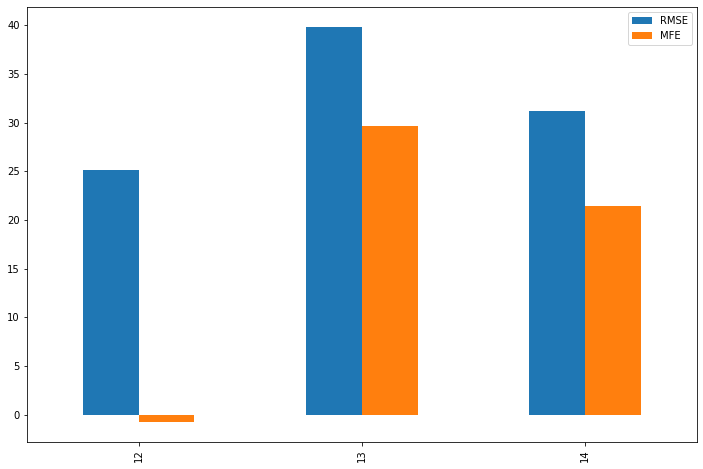

In [45]:
(grouped[['RMSE','MFE']]
 .pipe(lambda g: g.plot.bar(figsize=(12, 8)))
)